# Linear Algebra and Linear Regression

### 13th October 2015 Neil Lawrence


## Sum of Squares Error

Last week we considered a cost function for minimization of the error. We considered items (films) and users and assumed that each movie rating, $y_{i,j}$ could be summarised by an inner product between a vector associated with the item, $\mathbf{v}_j$ and one associated with the user $
\mathbf{u}_i$. We justified the inner product as a measure of similarity in the space of 'movie subjects', where both the users and the items lived, giving the analogy of a library.

To make predictions we encouraged the similarity to be high if the movie rating was high using the quadratic error function,
$$
E_{i,j}(\mathbf{u}_i, \mathbf{v}_j) = \left(\mathbf{u}_i^\top \mathbf{v}_j - y_{i,j}\right)^2,
$$
which we then summed across all the observations to form the total error
$$
E(\mathbf{U}, \mathbf{V}) = \sum_{i,j}s_{i,j}\left(\mathbf{u}_i^\top \mathbf{v}_j - y_{i,j}\right)^2,
$$
where $s_{i,j}$ is an indicator variable which is set to 1 if the rating of movie $j$ by user $i$ is provided in our data set. 

This is known as a sum of squares error. Minimizing it was first proposed by [Legendre](http://en.wikipedia.org/wiki/Adrien-Marie_Legendre) in 1805. His book, which was on the orbit of comets, is available on google books, we can take a look at the relevant page by calling the code below. 

In [1]:
import pods
pods.notebook.display_google_book(id='spcAAAAAMAAJ', page=72) 

Of course, the main text is in French, but the key part we are interested in can be roughly translated as

"In most matters where we take measures data through observation, the most accurate results they can offer, it is almost always leads to a system of equations of the form
$$E = a + bx + cy + fz + etc .$$
where a, b, c, f etc are the known coefficients and  x , y, z etc are unknown and must be determined by the condition that the value of E is reduced, for each equation, to an amount or zero or very small."

He continues

"Of all the principles that we can offer for this item, I think it is not broader, more accurate, nor easier than the one we have used in previous research application, and that is to make the minimum sum of the squares of the errors. By this means, it is between the errors a kind of balance that prevents extreme to prevail, is very specific to make known the state of the closest to the truth system. The sum of the squares of the errors $E^2 + \left.E^\prime\right.^2 + \left.E^{\prime\prime}\right.^2 + etc$ being
\begin{align*}   &(a + bx + cy + fz + etc)^2 \\
+ &(a^\prime + b^\prime x + c^\prime y + f^\prime z + etc ) ^2\\
+ &(a^{\prime\prime} + b^{\prime\prime}x  + c^{\prime\prime}y +  f^{\prime\prime}z + etc )^2 \\
+ & etc
\end{align*}
if we wanted a minimum, by varying x alone, we will have the equation ..."

This is the earliest know printed version of the problem of least squares. The notation, however, is a little awkward for mordern eyes. In particular Legendre doesn't make use of the sum sign,
$$
\sum_{i=1}^3 z_i = z_1 + z_2 + z_3
$$
nor does he make use of the inner product. 

In our notation, if we were to do linear regression, we would need to subsititue:
\begin{align*}
a &\leftarrow y_1-c, \\ a^\prime &\leftarrow y_2-c,\\ a^{\prime\prime} &\leftarrow y_3 -c,\\ 
\text{etc.} 
\end{align*}
to introduce the data observations $\{y_i\}_{i=1}^{n}$ alongside $c$, the offset. We would then introduce the input locations
\begin{align*}
b & \leftarrow x_1,\\
b^\prime & \leftarrow x_2,\\
b^{\prime\prime} & \leftarrow x_3\\
\text{etc.}
\end{align*}
and finally the gradient of the function
$$x \leftarrow -m.$$
The remaining coefficients ($c$ and $f$) would then be zero. That would give us 
\begin{align*}   &(y_1 - (mx_1+c))^2 \\
+ &(y_2 -(mx_2 + c))^2\\
+ &(y_3 -(mx_3 + c))^2 \\
+ & \text{etc.}
\end{align*}
which we would write in the modern notation for sums as
$$
\sum_{i=1}^n (y_i-(mx_i + c))^2
$$
which is recognised as the sum of squares error for a linear regression.

This shows the advantage of modern [summation operator](http://en.wikipedia.org/wiki/Summation), $\sum$,  in keeping our mathematical notation compact. Whilst it may look more complicated the first time you see it, understanding the mathematical rules that go around it, allows us to go much further with the notation.

Inner products (or [dot products](http://en.wikipedia.org/wiki/Dot_product)) are similar. They allow us to write
$$
\sum_{i=1}^q u_i v_i
$$
in a more compact notation,
$
\mathbf{u}\cdot\mathbf{v}.
$

Here we are using bold face to represent vectors, and we assume that the individual elements of a vector $\mathbf{z}$ are given as a series of scalars
$$
\mathbf{z} = \begin{bmatrix} z_1\\ z_2\\ \vdots\\ z_n \end{bmatrix}
$$
which are each indexed by their position in the vector.

## Linear Algebra

Linear algebra provides a very similar role, when we introduce [linear algebra](http://en.wikipedia.org/wiki/Linear_algebra), it is because we are faced with a large number of addition and multiplication operations. These operations need to be done together and would be very tedious to write down as a group. So the first reason we reach for linear algebra is for a more compact representation of our mathematical formulae. 

### Running Example: Olympic Marathons

Now we will load in the Olympic marathon data. This is data of the olympic marath times for the men's marathon from the first olympics in 1896 up until the London 2012 olympics.

In [2]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

Acquiring resource: olympic_marathon_men

Details of data: 
Olympic mens' marathon gold medal winning times from 1896 to 2012. Time given in pace (minutes per kilometer). Data is originally downloaded and collated from Wikipedia, we are not responsible for errors in the data

After downloading the data will take up 584 bytes of space.

Data will be stored in C:\Users\acp18dck/ods_data_cache/olympic_marathon_men.

Do you wish to proceed with the download? [yes/no]
yes
[==============================]   0.001/0.001MB                                                


You can see what these values are by typing:

In [3]:
print(x)
print(y)

[[1896.]
 [1900.]
 [1904.]
 [1908.]
 [1912.]
 [1920.]
 [1924.]
 [1928.]
 [1932.]
 [1936.]
 [1948.]
 [1952.]
 [1956.]
 [1960.]
 [1964.]
 [1968.]
 [1972.]
 [1976.]
 [1980.]
 [1984.]
 [1988.]
 [1992.]
 [1996.]
 [2000.]
 [2004.]
 [2008.]
 [2012.]]
[[4.47083333]
 [4.46472926]
 [5.22208333]
 [4.15467867]
 [3.90331675]
 [3.56951267]
 [3.82454477]
 [3.62483707]
 [3.59284275]
 [3.53880792]
 [3.67010309]
 [3.39029111]
 [3.43642612]
 [3.20583007]
 [3.13275665]
 [3.32819844]
 [3.13583758]
 [3.0789588 ]
 [3.10581822]
 [3.06552909]
 [3.09357349]
 [3.16111704]
 [3.14255244]
 [3.08527867]
 [3.10265829]
 [2.99877553]
 [3.03392977]]


Note that they are not `pandas` data frames for this example, they are just arrays of dimensionality $n\times 1$, where $n$ is the number of data.

The aim of this lab is to have you coding linear regression in python. We will do it in two ways, once using iterative updates (coordinate ascent) and then using linear algebra. The linear algebra approach will not only work much better, it is easy to extend to multiple input linear regression and *non-linear* regression using basis functions.

### Plotting the Data

You can make a plot of $y$ vs $x$ with the following command:

Text(0,0.5,'pace in min/km')

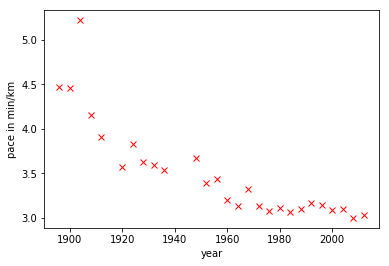

In [4]:
%matplotlib inline 
import pylab as plt

plt.plot(x, y, 'rx')
plt.xlabel('year')
plt.ylabel('pace in min/km')

### Maximum Likelihood: Iterative Solution

Now we will take the maximum likelihood approach we derived in the lecture to fit a line, $y_i=mx_i + c$, to the data you've plotted. We are trying to minimize the error function:

$$E(m, c) =  \sum_{i=1}^n(y_i-mx_i-c)^2$$

with respect to $m$, $c$ and $\sigma^2$. We can start with an initial guess for $m$, 

In [5]:
m = -0.4
c = 80 

Then we use the maximum likelihood update to find an estimate for the offset, $c$.

### Coordinate Descent

In the movie recommender system example, we minimised the objective function by steepest descent based gradient methods. Our updates required us to compute the gradient at the position we were located, then to update the gradient according to the direction of steepest descent. This time, we will take another approach. It is known as *coordinate descent*. In coordinate descent, we choose to move one parameter at a time. Ideally, we design an algorithm that at each step moves the parameter to its minimum value. At each step we choose to move the individual parameter to its minimum.

To find the minimum, we look for the point in the curve where the gradient is zero. This can be found by taking the gradient of $E(m,c)$ with respect to the parameter. 

#### Update for Offset

Let's consider the parameter $c$ first. The gradient goes nicely through the summation operator, and we obtain
$$
\frac{\text{d}E(m,c)}{\text{d}c} = -\sum_{i=1}^n 2(y_i-mx_i-c).
$$
Now we want the point that is a minimum. A minimum is an example of a [*stationary point*](http://en.wikipedia.org/wiki/Stationary_point), the stationary points are those points of the function where the gradient is zero. They are found by solving the equation for $\frac{\text{d}E(m,c)}{\text{d}c} = 0$. Substituting in to our gradient, we can obtain the following equation, 
$$
0 = -\sum_{i=1}^n 2(y_i-mx_i-c)
$$
which can be reorganised as follows,
$$
c^* = \frac{\sum_{i=1}^n(y_i-m^*x_i)}{n}.
$$
The fact that the stationary point is easily extracted in this manner implies that the solution is *unique*. There is only one stationary point for this system. Traditionally when trying to determine the type of stationary point we have encountered we now compute the *second derivative*,
$$
\frac{\text{d}^2E(m,c)}{\text{d}c^2} = 2n.
$$
The second derivative is positive, which in turn implies that we have found a minimum of the function. This means that setting $c$ in this way will take us to the lowest point along that axes.

In [6]:
# set c to the minimum
c = (y - m*x).mean()
print(c)

786.0197711453593


#### Update for Slope

Now we have the offset set to the minimum value, in coordinate descent, the next step is to optimise another parameter. Only one further parameter remains. That is the slope of the system. 

Now we can turn our attention to the slope. We once again peform the same set of computations to find the minima. We end up with an update equation of the following form.

$$m^* = \frac{\sum_{i=1}^n (y_i - c)x_i}{\sum_{i=1}^n x_i^2}$$

Communication of mathematics in data science is an essential skill, in a moment, you will be asked to rederive the equation above. Before we do that, however, we will briefly review how to write mathematics in the notebook.

### $\LaTeX$ for Maths

These cells use [Markdown format](http://en.wikipedia.org/wiki/Markdown). You can include maths in your markdown using [$\LaTeX$ syntax](http://en.wikipedia.org/wiki/LaTeX), all you have to do is write your answer inside dollar signs, as follows:

To write a fraction, we write `$\frac{a}{b}$`, and it will display like this $\frac{a}{b}$. To write a subscript we write `$a_b$` which will appear as $a_b$. To write a superscript (for example in a polynomial) we write `$a^b$` which will appear as $a^b$. There are lots of other macros as well, for example we can do greek letters such as `$\alpha, \beta, \gamma$` rendering as $\alpha, \beta, \gamma$. And we can do sum and intergral signs as `$\sum \int \int$`.

You can combine many of these operations together for composing expressions.

### Assignment Question 1 

Convert the following python code expressions into $\LaTeX$j, writing your answers below. In each case write your answer as a single equality (i.e. your maths should only contain one expression, not several lines of expressions). For the purposes of your $\LaTeX$ please assume that `x` and `w` are $n$ dimensional vectors. 

(a) 
``` python
f = x.sum()
```

(b) 
``` python 
m = x.mean()
```

(c) 
``` python
g = (x*w).sum()
```

*15 marks*

#### Question 1 Answer

a) $f = \sum_i^n{x_i}$

b) $m = \frac{(\sum_{i}^n{x_i})}{n}$

c) $g = \sum_i^n{(x_i \times w_i)}$

### Gradient With Respect to the Slope
Now that you've had a little training in writing maths with $\LaTeX$, we will be able to use it to answer questions. The next thing we are going to do is a little differentiation practice. 

### Assignment Question 2

Derive the the gradient of the objective function with respect to the slope, $m$. Rearrange it to show that the update equation written above does find the stationary points of the objective function. By computing its derivative show that it's a minimum.

*20 marks*

#### Question 2 Answer

$\sum{(m,c)} = \sum_{i=1}^n(y_i - mx_i - c)^2$

$\frac{dE(m,c)}{dm} = \sum_{i=1}^n2(y_i - mx_i - c)(-x_i) = 0$

$\sum_{i=1}^n(y_i - mx_i - c)x_i = 0$

$\sum_{i=1}^n[(y_i - c) - mx_i]x_i = 0$

$\sum_{i=1}^n(y_i - c)x_i - m\sum_{i=1}^nx_i^2 = 0$

$\sum_{i=1}^n(y_i - c)x_i = m\sum_{i=1}^nx_i^2$

$m^* = \frac{\sum_{i=1}^n (y_i - c)x_i}{\sum_{i=1}^n x_i^2}$

$\frac{d^2E(m,c)}{dm^2} = 2\sum_{i=1}^nx_i^2$

To find the type of stationary points the objective function has, first the 2nd derivative is found. The 2nd derivative is shown in the equation directly above; given the only term is $x_i^2$, any number whether negative or positive squared is a positive. Hence the 2nd derivative is always positive meaning that the stationary point is a minimum.

In [7]:
m = ((y - c)*x).sum()/(x**2).sum()
print(m)

-0.3998724072997095


We can have a look at how good our fit is by computing the prediction across the input space. First create a vector of 'test points',

In [8]:
import numpy as np
x_test = np.linspace(1890, 2020, 130)[:, None]

Now use this vector to compute some test predictions,

In [9]:
f_test = m*x_test + c

Now plot those test predictions with a blue line on the same plot as the data,

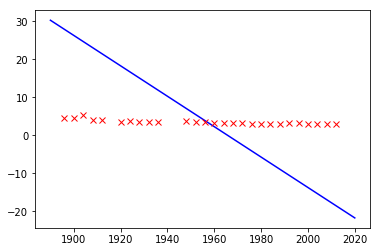

In [10]:
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

The fit isn't very good, we need to iterate between these parameter updates in a loop to improve the fit, we have to do this several times,

In [11]:
for i in np.arange(10):
    m = ((y - c)*x).sum()/(x*x).sum()
    c = (y-m*x).sum()/y.shape[0]
print(m)
print(c)

-0.3987259642505432
783.5273797273478


And let's try plotting the result again

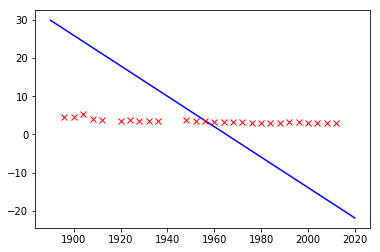

In [12]:
f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Clearly we need more iterations than 10! In the next question you will add more iterations and report on the error as optimisation proceeds. 

### Assignment Question 3

There is a problem here, we seem to need many interations to get to a good solution. Let's explore what's going on. Write code which alternates between updates of `c` and `m`. Include the following features in your code.

(a) Initialise with `m=-0.4` and `c=80`.
(b) Every 10 iterations compute the value of the objective function for the training data and print it to the screen (you'll find hints on this in the lab from last week.
(c) Cause the code to stop running when the error change over less than 10 iterations is smaller than $1\times10^{-4}$. This is known as a stopping criterion.

Why do we need so many iterations to get to the solution?

*25 marks*

In [14]:
# Question 3 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.

m = -0.4
c = 80
switch = True
iterations = 500000
error = ((y - m*x - c)**2).sum()

for itera in range(iterations):
    # If switch is true, update m
    if switch == True:
        m = ((y - c)*x).sum()/(x*x).sum()
        if itera % 10 == 0:
            switch = False
            newError = ((y - m*x - c)**2).sum()
            print("Iteration:", itera, "Obj Func", newError)
            if abs(error - newError) <= 0.0001:
                break
            else:
                error = newError
    # If switch is false, update C 
    else:
        c = (y-m*x).sum()/y.shape[0]
        if itera % 10 == 0:
            switch = True
            newError = ((y - m*x - c)**2).sum()
            print("Iteration:", itera, "Obj Func", newError)
            if abs(error - newError) <= 0.0001:
                break
            else:
                error = newError 

Iteration: 0 Obj Func 25.22765845535739
Iteration: 10 Obj Func 25.219994152341418
Iteration: 20 Obj Func 25.21233237609605
Iteration: 30 Obj Func 25.204673125788233
Iteration: 40 Obj Func 25.197016400585184
Iteration: 50 Obj Func 25.189362199654532
Iteration: 60 Obj Func 25.181710522164124
Iteration: 70 Obj Func 25.174061367281787
Iteration: 80 Obj Func 25.166414734175902
Iteration: 90 Obj Func 25.158770622015272
Iteration: 100 Obj Func 25.151129029968754
Iteration: 110 Obj Func 25.143489957205443
Iteration: 120 Obj Func 25.13585340289476
Iteration: 130 Obj Func 25.128219366206487
Iteration: 140 Obj Func 25.120587846310634
Iteration: 150 Obj Func 25.112958842377378
Iteration: 160 Obj Func 25.10533235357731
Iteration: 170 Obj Func 25.09770837908122
Iteration: 180 Obj Func 25.09008691806021
Iteration: 190 Obj Func 25.082467969685627
Iteration: 200 Obj Func 25.074851533129063
Iteration: 210 Obj Func 25.067237607562483
Iteration: 220 Obj Func 25.059626192158046
Iteration: 230 Obj Func 25.0

Iteration: 5510 Obj Func 21.365404114682335
Iteration: 5520 Obj Func 21.359013121276462
Iteration: 5530 Obj Func 21.35262423485599
Iteration: 5540 Obj Func 21.346237454726246
Iteration: 5550 Obj Func 21.3398527801928
Iteration: 5560 Obj Func 21.333470210561487
Iteration: 5570 Obj Func 21.327089745138395
Iteration: 5580 Obj Func 21.320711383229806
Iteration: 5590 Obj Func 21.314335124142193
Iteration: 5600 Obj Func 21.30796096718228
Iteration: 5610 Obj Func 21.301588911657102
Iteration: 5620 Obj Func 21.29521895687381
Iteration: 5630 Obj Func 21.288851102139862
Iteration: 5640 Obj Func 21.282485346762908
Iteration: 5650 Obj Func 21.276121690050825
Iteration: 5660 Obj Func 21.269760131311774
Iteration: 5670 Obj Func 21.263400669853986
Iteration: 5680 Obj Func 21.257043304986
Iteration: 5690 Obj Func 21.250688036016772
Iteration: 5700 Obj Func 21.244334862255236
Iteration: 5710 Obj Func 21.23798378301066
Iteration: 5720 Obj Func 21.23163479759248
Iteration: 5730 Obj Func 21.22528790531050

Iteration: 10510 Obj Func 18.418939534078586
Iteration: 10520 Obj Func 18.413519932335635
Iteration: 10530 Obj Func 18.408102117329218
Iteration: 10540 Obj Func 18.40268608847024
Iteration: 10550 Obj Func 18.397271845169954
Iteration: 10560 Obj Func 18.391859386839567
Iteration: 10570 Obj Func 18.38644871289076
Iteration: 10580 Obj Func 18.381039822735286
Iteration: 10590 Obj Func 18.375632715784853
Iteration: 10600 Obj Func 18.37022739145165
Iteration: 10610 Obj Func 18.364823849148035
Iteration: 10620 Obj Func 18.35942208828653
Iteration: 10630 Obj Func 18.35402210827974
Iteration: 10640 Obj Func 18.348623908540564
Iteration: 10650 Obj Func 18.343227488482142
Iteration: 10660 Obj Func 18.33783284751773
Iteration: 10670 Obj Func 18.332439985060777
Iteration: 10680 Obj Func 18.327048900524964
Iteration: 10690 Obj Func 18.321659593324124
Iteration: 10700 Obj Func 18.316272062872297
Iteration: 10710 Obj Func 18.31088630858376
Iteration: 10720 Obj Func 18.305502329872937
Iteration: 10730 

Iteration: 15510 Obj Func 15.920319435044238
Iteration: 15520 Obj Func 15.915723579410045
Iteration: 15530 Obj Func 15.911129238939445
Iteration: 15540 Obj Func 15.906536413132951
Iteration: 15550 Obj Func 15.901945101491126
Iteration: 15560 Obj Func 15.897355303514797
Iteration: 15570 Obj Func 15.892767018704987
Iteration: 15580 Obj Func 15.888180246562847
Iteration: 15590 Obj Func 15.88359498658962
Iteration: 15600 Obj Func 15.879011238286772
Iteration: 15610 Obj Func 15.874429001155985
Iteration: 15620 Obj Func 15.869848274699097
Iteration: 15630 Obj Func 15.865269058417933
Iteration: 15640 Obj Func 15.860691351814664
Iteration: 15650 Obj Func 15.856115154391631
Iteration: 15660 Obj Func 15.851540465651256
Iteration: 15670 Obj Func 15.846967285096168
Iteration: 15680 Obj Func 15.842395612229204
Iteration: 15690 Obj Func 15.837825446553179
Iteration: 15700 Obj Func 15.833256787571244
Iteration: 15710 Obj Func 15.82868963478671
Iteration: 15720 Obj Func 15.824123987702968
Iteration: 1

Iteration: 20510 Obj Func 13.801474212740933
Iteration: 20520 Obj Func 13.797576898876956
Iteration: 20530 Obj Func 13.793680869880971
Iteration: 20540 Obj Func 13.789786125329375
Iteration: 20550 Obj Func 13.785892664798848
Iteration: 20560 Obj Func 13.782000487866085
Iteration: 20570 Obj Func 13.778109594107745
Iteration: 20580 Obj Func 13.774219983100807
Iteration: 20590 Obj Func 13.770331654422494
Iteration: 20600 Obj Func 13.76644460765001
Iteration: 20610 Obj Func 13.76255884236069
Iteration: 20620 Obj Func 13.758674358132131
Iteration: 20630 Obj Func 13.754791154541895
Iteration: 20640 Obj Func 13.750909231167734
Iteration: 20650 Obj Func 13.747028587587765
Iteration: 20660 Obj Func 13.743149223379978
Iteration: 20670 Obj Func 13.739271138122593
Iteration: 20680 Obj Func 13.735394331393929
Iteration: 20690 Obj Func 13.731518802772545
Iteration: 20700 Obj Func 13.727644551837095
Iteration: 20710 Obj Func 13.723771578166247
Iteration: 20720 Obj Func 13.719899881338943
Iteration: 2

Iteration: 25510 Obj Func 12.004680423315959
Iteration: 25520 Obj Func 12.001375477172362
Iteration: 25530 Obj Func 11.99807162060478
Iteration: 25540 Obj Func 11.994768853254005
Iteration: 25550 Obj Func 11.991467174760931
Iteration: 25560 Obj Func 11.98816658476659
Iteration: 25570 Obj Func 11.98486708291213
Iteration: 25580 Obj Func 11.981568668838804
Iteration: 25590 Obj Func 11.97827134218799
Iteration: 25600 Obj Func 11.974975102601203
Iteration: 25610 Obj Func 11.971679949720038
Iteration: 25620 Obj Func 11.968385883186226
Iteration: 25630 Obj Func 11.965092902641649
Iteration: 25640 Obj Func 11.961801007728274
Iteration: 25650 Obj Func 11.958510198088172
Iteration: 25660 Obj Func 11.955220473363521
Iteration: 25670 Obj Func 11.95193183319671
Iteration: 25680 Obj Func 11.948644277230157
Iteration: 25690 Obj Func 11.945357805106408
Iteration: 25700 Obj Func 11.94207241646813
Iteration: 25710 Obj Func 11.938788110958152
Iteration: 25720 Obj Func 11.935504888219407
Iteration: 25730

Iteration: 30510 Obj Func 10.480988231109853
Iteration: 30520 Obj Func 10.478185616439047
Iteration: 30530 Obj Func 10.475383925735413
Iteration: 30540 Obj Func 10.472583158694325
Iteration: 30550 Obj Func 10.469783315011275
Iteration: 30560 Obj Func 10.466984394381832
Iteration: 30570 Obj Func 10.464186396501715
Iteration: 30580 Obj Func 10.461389321066717
Iteration: 30590 Obj Func 10.45859316777269
Iteration: 30600 Obj Func 10.455797936315633
Iteration: 30610 Obj Func 10.453003626391645
Iteration: 30620 Obj Func 10.450210237696911
Iteration: 30630 Obj Func 10.447417769927721
Iteration: 30640 Obj Func 10.444626222780474
Iteration: 30650 Obj Func 10.441835595951627
Iteration: 30660 Obj Func 10.439045889137766
Iteration: 30670 Obj Func 10.436257102035624
Iteration: 30680 Obj Func 10.433469234341976
Iteration: 30690 Obj Func 10.430682285753699
Iteration: 30700 Obj Func 10.427896255967783
Iteration: 30710 Obj Func 10.425111144681324
Iteration: 30720 Obj Func 10.4223269515915
Iteration: 30

Iteration: 36460 Obj Func 8.966570573294907
Iteration: 36470 Obj Func 8.964267232464554
Iteration: 36480 Obj Func 8.961964651000574
Iteration: 36490 Obj Func 8.959662828652595
Iteration: 36500 Obj Func 8.957361765170331
Iteration: 36510 Obj Func 8.955061460303646
Iteration: 36520 Obj Func 8.952761913802446
Iteration: 36530 Obj Func 8.95046312541667
Iteration: 36540 Obj Func 8.948165094896401
Iteration: 36550 Obj Func 8.945867821991783
Iteration: 36560 Obj Func 8.943571306453057
Iteration: 36570 Obj Func 8.941275548030513
Iteration: 36580 Obj Func 8.938980546474548
Iteration: 36590 Obj Func 8.936686301535657
Iteration: 36600 Obj Func 8.934392812964395
Iteration: 36610 Obj Func 8.932100080511388
Iteration: 36620 Obj Func 8.92980810392735
Iteration: 36630 Obj Func 8.927516882963115
Iteration: 36640 Obj Func 8.925226417369574
Iteration: 36650 Obj Func 8.922936706897662
Iteration: 36660 Obj Func 8.920647751298421
Iteration: 36670 Obj Func 8.91835955032304
Iteration: 36680 Obj Func 8.9160721

Iteration: 41670 Obj Func 7.863769135352414
Iteration: 41680 Obj Func 7.861829366556742
Iteration: 41690 Obj Func 7.859890237264826
Iteration: 41700 Obj Func 7.857951747265851
Iteration: 41710 Obj Func 7.85601389634907
Iteration: 41720 Obj Func 7.854076684303791
Iteration: 41730 Obj Func 7.852140110919372
Iteration: 41740 Obj Func 7.8502041759852546
Iteration: 41750 Obj Func 7.848268879290979
Iteration: 41760 Obj Func 7.84633422062612
Iteration: 41770 Obj Func 7.844400199780329
Iteration: 41780 Obj Func 7.842466816543337
Iteration: 41790 Obj Func 7.840534070704923
Iteration: 41800 Obj Func 7.838601962054939
Iteration: 41810 Obj Func 7.836670490383358
Iteration: 41820 Obj Func 7.834739655480162
Iteration: 41830 Obj Func 7.832809457135408
Iteration: 41840 Obj Func 7.830879895139256
Iteration: 41850 Obj Func 7.8289509692818875
Iteration: 41860 Obj Func 7.8270226793535835
Iteration: 41870 Obj Func 7.825095025144714
Iteration: 41880 Obj Func 7.823168006445684
Iteration: 41890 Obj Func 7.821

Iteration: 46750 Obj Func 6.956325660202306
Iteration: 46760 Obj Func 6.954685057747206
Iteration: 46770 Obj Func 6.9530449961666
Iteration: 46780 Obj Func 6.951405475282181
Iteration: 46790 Obj Func 6.949766494915691
Iteration: 46800 Obj Func 6.948128054888931
Iteration: 46810 Obj Func 6.946490155023748
Iteration: 46820 Obj Func 6.944852795142023
Iteration: 46830 Obj Func 6.943215975065832
Iteration: 46840 Obj Func 6.941579694617202
Iteration: 46850 Obj Func 6.9399439536181475
Iteration: 46860 Obj Func 6.93830875189088
Iteration: 46870 Obj Func 6.936674089257575
Iteration: 46880 Obj Func 6.93503996554049
Iteration: 46890 Obj Func 6.9334063805620225
Iteration: 46900 Obj Func 6.931773334144532
Iteration: 46910 Obj Func 6.930140826110458
Iteration: 46920 Obj Func 6.9285088562823205
Iteration: 46930 Obj Func 6.926877424482658
Iteration: 46940 Obj Func 6.925246530534098
Iteration: 46950 Obj Func 6.92361617425934
Iteration: 46960 Obj Func 6.921986355481131
Iteration: 46970 Obj Func 6.920357

Iteration: 53000 Obj Func 6.029554282743595
Iteration: 53010 Obj Func 6.028219218659937
Iteration: 53020 Obj Func 6.026884594720746
Iteration: 53030 Obj Func 6.025550410780939
Iteration: 53040 Obj Func 6.024216666695449
Iteration: 53050 Obj Func 6.022883362319255
Iteration: 53060 Obj Func 6.021550497507418
Iteration: 53070 Obj Func 6.020218072114989
Iteration: 53080 Obj Func 6.018886085997107
Iteration: 53090 Obj Func 6.017554539008971
Iteration: 53100 Obj Func 6.01622343100581
Iteration: 53110 Obj Func 6.01489276184287
Iteration: 53120 Obj Func 6.013562531375469
Iteration: 53130 Obj Func 6.012232739459022
Iteration: 53140 Obj Func 6.010903385948925
Iteration: 53150 Obj Func 6.009574470700648
Iteration: 53160 Obj Func 6.008245993569704
Iteration: 53170 Obj Func 6.006917954411647
Iteration: 53180 Obj Func 6.005590353082082
Iteration: 53190 Obj Func 6.004263189436669
Iteration: 53200 Obj Func 6.002936463331109
Iteration: 53210 Obj Func 6.001610174621174
Iteration: 53220 Obj Func 6.000284

Iteration: 58000 Obj Func 5.414044488640016
Iteration: 58010 Obj Func 5.4129123460801125
Iteration: 58020 Obj Func 5.411780576765425
Iteration: 58030 Obj Func 5.410649180572934
Iteration: 58040 Obj Func 5.409518157379621
Iteration: 58050 Obj Func 5.408387507062491
Iteration: 58060 Obj Func 5.407257229498608
Iteration: 58070 Obj Func 5.406127324565112
Iteration: 58080 Obj Func 5.404997792139181
Iteration: 58090 Obj Func 5.403868632097932
Iteration: 58100 Obj Func 5.402739844318645
Iteration: 58110 Obj Func 5.4016114286785655
Iteration: 58120 Obj Func 5.400483385054986
Iteration: 58130 Obj Func 5.399355713325333
Iteration: 58140 Obj Func 5.398228413366972
Iteration: 58150 Obj Func 5.397101485057319
Iteration: 58160 Obj Func 5.395974928273848
Iteration: 58170 Obj Func 5.3948487428940926
Iteration: 58180 Obj Func 5.39372292879559
Iteration: 58190 Obj Func 5.392597485855955
Iteration: 58200 Obj Func 5.391472413952827
Iteration: 58210 Obj Func 5.390347712963859
Iteration: 58220 Obj Func 5.38

Iteration: 64250 Obj Func 4.774500572040171
Iteration: 64260 Obj Func 4.773579274583481
Iteration: 64270 Obj Func 4.772658280860528
Iteration: 64280 Obj Func 4.77173759077118
Iteration: 64290 Obj Func 4.770817204215311
Iteration: 64300 Obj Func 4.769897121092839
Iteration: 64310 Obj Func 4.768977341303776
Iteration: 64320 Obj Func 4.768057864748104
Iteration: 64330 Obj Func 4.767138691325834
Iteration: 64340 Obj Func 4.766219820937036
Iteration: 64350 Obj Func 4.76530125348181
Iteration: 64360 Obj Func 4.764382988860288
Iteration: 64370 Obj Func 4.763465026972621
Iteration: 64380 Obj Func 4.762547367718993
Iteration: 64390 Obj Func 4.7616300109996645
Iteration: 64400 Obj Func 4.7607129567148805
Iteration: 64410 Obj Func 4.759796204764931
Iteration: 64420 Obj Func 4.758879755050151
Iteration: 64430 Obj Func 4.757963607470885
Iteration: 64440 Obj Func 4.757047761927536
Iteration: 64450 Obj Func 4.756132218320522
Iteration: 64460 Obj Func 4.755216976550302
Iteration: 64470 Obj Func 4.7543

Iteration: 69920 Obj Func 4.297971837751703
Iteration: 69930 Obj Func 4.297207642485444
Iteration: 69940 Obj Func 4.296443699159394
Iteration: 69950 Obj Func 4.295680007690496
Iteration: 69960 Obj Func 4.294916567995714
Iteration: 69970 Obj Func 4.294153379992053
Iteration: 69980 Obj Func 4.293390443596516
Iteration: 69990 Obj Func 4.292627758726177
Iteration: 70000 Obj Func 4.291865325298105
Iteration: 70010 Obj Func 4.2911031432294
Iteration: 70020 Obj Func 4.290341212437198
Iteration: 70030 Obj Func 4.289579532838652
Iteration: 70040 Obj Func 4.2888181043509315
Iteration: 70050 Obj Func 4.288056926891287
Iteration: 70060 Obj Func 4.287296000376976
Iteration: 70070 Obj Func 4.286535324725201
Iteration: 70080 Obj Func 4.285774899853288
Iteration: 70090 Obj Func 4.285014725678563
Iteration: 70100 Obj Func 4.2842548021183795
Iteration: 70110 Obj Func 4.283495129090106
Iteration: 70120 Obj Func 4.282735706511165
Iteration: 70130 Obj Func 4.281976534298961
Iteration: 70140 Obj Func 4.2812

Iteration: 75500 Obj Func 3.908416459810104
Iteration: 75510 Obj Func 3.907780693322134
Iteration: 75520 Obj Func 3.907145136433955
Iteration: 75530 Obj Func 3.9065097890764005
Iteration: 75540 Obj Func 3.9058746511804077
Iteration: 75550 Obj Func 3.9052397226769604
Iteration: 75560 Obj Func 3.9046050034969957
Iteration: 75570 Obj Func 3.9039704935715225
Iteration: 75580 Obj Func 3.903336192831554
Iteration: 75590 Obj Func 3.902702101208106
Iteration: 75600 Obj Func 3.9020682186322437
Iteration: 75610 Obj Func 3.901434545035054
Iteration: 75620 Obj Func 3.9008010803476294
Iteration: 75630 Obj Func 3.9001678245011133
Iteration: 75640 Obj Func 3.899534777426647
Iteration: 75650 Obj Func 3.898901939055402
Iteration: 75660 Obj Func 3.8982693093185796
Iteration: 75670 Obj Func 3.897636888147385
Iteration: 75680 Obj Func 3.89700467547306
Iteration: 75690 Obj Func 3.896372671226874
Iteration: 75700 Obj Func 3.895740875340092
Iteration: 75710 Obj Func 3.8951092877440585
Iteration: 75720 Obj Fu

Iteration: 80500 Obj Func 3.6153065597702017
Iteration: 80510 Obj Func 3.6147674258754345
Iteration: 80520 Obj Func 3.6142284697225517
Iteration: 80530 Obj Func 3.6136896912529575
Iteration: 80540 Obj Func 3.613151090408064
Iteration: 80550 Obj Func 3.612612667129329
Iteration: 80560 Obj Func 3.6120744213581846
Iteration: 80570 Obj Func 3.611536353036149
Iteration: 80580 Obj Func 3.6109984621047153
Iteration: 80590 Obj Func 3.61046074850537
Iteration: 80600 Obj Func 3.609923212179684
Iteration: 80610 Obj Func 3.609385853069179
Iteration: 80620 Obj Func 3.6088486711154486
Iteration: 80630 Obj Func 3.6083116662600876
Iteration: 80640 Obj Func 3.607774838444694
Iteration: 80650 Obj Func 3.6072381876109323
Iteration: 80660 Obj Func 3.6067017137004442
Iteration: 80670 Obj Func 3.606165416654892
Iteration: 80680 Obj Func 3.605629296415965
Iteration: 80690 Obj Func 3.6050933529253877
Iteration: 80700 Obj Func 3.6045575861248786
Iteration: 80710 Obj Func 3.604021995956193
Iteration: 80720 Obj 

Iteration: 86550 Obj Func 3.3195564578724155
Iteration: 86560 Obj Func 3.319114826993678
Iteration: 86570 Obj Func 3.3186733417120053
Iteration: 86580 Obj Func 3.318232001979393
Iteration: 86590 Obj Func 3.3177908077478375
Iteration: 86600 Obj Func 3.317349758969387
Iteration: 86610 Obj Func 3.316908855596072
Iteration: 86620 Obj Func 3.3164680975799676
Iteration: 86630 Obj Func 3.3160274848731435
Iteration: 86640 Obj Func 3.315587017427701
Iteration: 86650 Obj Func 3.3151466951957484
Iteration: 86660 Obj Func 3.3147065181294013
Iteration: 86670 Obj Func 3.314266486180822
Iteration: 86680 Obj Func 3.3138265993021383
Iteration: 86690 Obj Func 3.3133868574455594
Iteration: 86700 Obj Func 3.3129472605632815
Iteration: 86710 Obj Func 3.3125078086074637
Iteration: 86720 Obj Func 3.312068501530345
Iteration: 86730 Obj Func 3.3116293392841687
Iteration: 86740 Obj Func 3.3111903218211887
Iteration: 86750 Obj Func 3.3107514490936634
Iteration: 86760 Obj Func 3.310312721053874
Iteration: 86770 O

Iteration: 91740 Obj Func 3.1088551189923446
Iteration: 91750 Obj Func 3.108482952218262
Iteration: 91760 Obj Func 3.1081109081402714
Iteration: 91770 Obj Func 3.1077389867179304
Iteration: 91780 Obj Func 3.1073671879108145
Iteration: 91790 Obj Func 3.106995511678466
Iteration: 91800 Obj Func 3.1066239579804726
Iteration: 91810 Obj Func 3.106252526776476
Iteration: 91820 Obj Func 3.10588121802608
Iteration: 91830 Obj Func 3.105510031688899
Iteration: 91840 Obj Func 3.1051389677245766
Iteration: 91850 Obj Func 3.104768026092782
Iteration: 91860 Obj Func 3.104397206753181
Iteration: 91870 Obj Func 3.1040265096654513
Iteration: 91880 Obj Func 3.103655934789289
Iteration: 91890 Obj Func 3.103285482084407
Iteration: 91900 Obj Func 3.102915151510524
Iteration: 91910 Obj Func 3.102544943027379
Iteration: 91920 Obj Func 3.102174856594734
Iteration: 91930 Obj Func 3.1018048921723245
Iteration: 91940 Obj Func 3.101435049719929
Iteration: 91950 Obj Func 3.101065329197356
Iteration: 91960 Obj Func

Iteration: 97710 Obj Func 2.9071398737772456
Iteration: 97720 Obj Func 2.9068342085687116
Iteration: 97730 Obj Func 2.9065286441320195
Iteration: 97740 Obj Func 2.9062231804339405
Iteration: 97750 Obj Func 2.9059178174412574
Iteration: 97760 Obj Func 2.9056125551207783
Iteration: 97770 Obj Func 2.9053073934393012
Iteration: 97780 Obj Func 2.9050023323636385
Iteration: 97790 Obj Func 2.9046973718606526
Iteration: 97800 Obj Func 2.9043925118971736
Iteration: 97810 Obj Func 2.9040877524400535
Iteration: 97820 Obj Func 2.903783093456166
Iteration: 97830 Obj Func 2.9034785349123693
Iteration: 97840 Obj Func 2.903174076775557
Iteration: 97850 Obj Func 2.9028697190126325
Iteration: 97860 Obj Func 2.902565461590501
Iteration: 97870 Obj Func 2.9022613044760814
Iteration: 97880 Obj Func 2.901957247636308
Iteration: 97890 Obj Func 2.9016532910381163
Iteration: 97900 Obj Func 2.9013494346484427
Iteration: 97910 Obj Func 2.9010456784342886
Iteration: 97920 Obj Func 2.9007420223626244
Iteration: 979

Iteration: 102990 Obj Func 2.7589922947803096
Iteration: 103000 Obj Func 2.758735470926959
Iteration: 103010 Obj Func 2.758478731743412
Iteration: 103020 Obj Func 2.758222077201764
Iteration: 103030 Obj Func 2.757965507274073
Iteration: 103040 Obj Func 2.7577090219324436
Iteration: 103050 Obj Func 2.7574526211490262
Iteration: 103060 Obj Func 2.75719630489594
Iteration: 103070 Obj Func 2.7569400731452887
Iteration: 103080 Obj Func 2.7566839258692295
Iteration: 103090 Obj Func 2.7564278630399053
Iteration: 103100 Obj Func 2.7561718846294685
Iteration: 103110 Obj Func 2.7559159906101147
Iteration: 103120 Obj Func 2.7556601809540124
Iteration: 103130 Obj Func 2.7554044556333377
Iteration: 103140 Obj Func 2.755148814620284
Iteration: 103150 Obj Func 2.7548932578870735
Iteration: 103160 Obj Func 2.7546377854058957
Iteration: 103170 Obj Func 2.7543823971490076
Iteration: 103180 Obj Func 2.754127093088645
Iteration: 103190 Obj Func 2.7538718731970118
Iteration: 103200 Obj Func 2.7536167374463

Iteration: 109240 Obj Func 2.6139132748227216
Iteration: 109250 Obj Func 2.6137042806807487
Iteration: 109260 Obj Func 2.6134953554400404
Iteration: 109270 Obj Func 2.613286499077901
Iteration: 109280 Obj Func 2.613077711571616
Iteration: 109290 Obj Func 2.6128689928984814
Iteration: 109300 Obj Func 2.612660343035802
Iteration: 109310 Obj Func 2.612451761960899
Iteration: 109320 Obj Func 2.6122432496510903
Iteration: 109330 Obj Func 2.6120348060837073
Iteration: 109340 Obj Func 2.611826431236093
Iteration: 109350 Obj Func 2.6116181250855774
Iteration: 109360 Obj Func 2.611409887609511
Iteration: 109370 Obj Func 2.611201718785269
Iteration: 109380 Obj Func 2.6109936185902125
Iteration: 109390 Obj Func 2.6107855870017134
Iteration: 109400 Obj Func 2.6105776239971563
Iteration: 109410 Obj Func 2.610369729553927
Iteration: 109420 Obj Func 2.610161903649427
Iteration: 109430 Obj Func 2.6099541462610545
Iteration: 109440 Obj Func 2.6097464573662146
Iteration: 109450 Obj Func 2.60953883694234

Iteration: 114240 Obj Func 2.517559891588423
Iteration: 114250 Obj Func 2.517382663269728
Iteration: 114260 Obj Func 2.5172054933797403
Iteration: 114270 Obj Func 2.517028381899193
Iteration: 114280 Obj Func 2.516851328808835
Iteration: 114290 Obj Func 2.5166743340894095
Iteration: 114300 Obj Func 2.5164973977216727
Iteration: 114310 Obj Func 2.5163205196863943
Iteration: 114320 Obj Func 2.516143699964332
Iteration: 114330 Obj Func 2.515966938536277
Iteration: 114340 Obj Func 2.515790235383016
Iteration: 114350 Obj Func 2.5156135904853114
Iteration: 114360 Obj Func 2.5154370038239664
Iteration: 114370 Obj Func 2.515260475379787
Iteration: 114380 Obj Func 2.5150840051335623
Iteration: 114390 Obj Func 2.514907593066139
Iteration: 114400 Obj Func 2.5147312391583307
Iteration: 114410 Obj Func 2.514554943390939
Iteration: 114420 Obj Func 2.5143787057448046
Iteration: 114430 Obj Func 2.514202526200774
Iteration: 114440 Obj Func 2.5140264047396883
Iteration: 114450 Obj Func 2.513850341342401


Iteration: 120490 Obj Func 2.417444149025697
Iteration: 120500 Obj Func 2.417299926906451
Iteration: 120510 Obj Func 2.4171557523344234
Iteration: 120520 Obj Func 2.417011625293928
Iteration: 120530 Obj Func 2.416867545769295
Iteration: 120540 Obj Func 2.4167235137448513
Iteration: 120550 Obj Func 2.416579529204953
Iteration: 120560 Obj Func 2.416435592133944
Iteration: 120570 Obj Func 2.4162917025161614
Iteration: 120580 Obj Func 2.4161478603359687
Iteration: 120590 Obj Func 2.416004065577725
Iteration: 120600 Obj Func 2.415860318225806
Iteration: 120610 Obj Func 2.415716618264564
Iteration: 120620 Obj Func 2.415572965678365
Iteration: 120630 Obj Func 2.415429360451629
Iteration: 120640 Obj Func 2.4152858025687407
Iteration: 120650 Obj Func 2.415142292014058
Iteration: 120660 Obj Func 2.414998828771997
Iteration: 120670 Obj Func 2.414855412826955
Iteration: 120680 Obj Func 2.414712044163337
Iteration: 120690 Obj Func 2.4145687227655643
Iteration: 120700 Obj Func 2.414425448618053
Iter

Iteration: 126740 Obj Func 2.335973508963434
Iteration: 126750 Obj Func 2.335856146118545
Iteration: 126760 Obj Func 2.3357388219658928
Iteration: 126770 Obj Func 2.3356215364927104
Iteration: 126780 Obj Func 2.335504289686228
Iteration: 126790 Obj Func 2.3353870815337445
Iteration: 126800 Obj Func 2.335269912022517
Iteration: 126810 Obj Func 2.3351527811397585
Iteration: 126820 Obj Func 2.3350356888727504
Iteration: 126830 Obj Func 2.3349186352087776
Iteration: 126840 Obj Func 2.334801620135102
Iteration: 126850 Obj Func 2.3346846436390076
Iteration: 126860 Obj Func 2.334567705707776
Iteration: 126870 Obj Func 2.3344508063286864
Iteration: 126880 Obj Func 2.3343339454890364
Iteration: 126890 Obj Func 2.3342171231761135
Iteration: 126900 Obj Func 2.3341003393772124
Iteration: 126910 Obj Func 2.3339835940796476
Iteration: 126920 Obj Func 2.3338668872707142
Iteration: 126930 Obj Func 2.3337502189377366
Iteration: 126940 Obj Func 2.3336335890680324
Iteration: 126950 Obj Func 2.33351699764

#### Question 3 Answer Here

This solution takes over 130,000 iterations for the error change to decrease to an adequate amount. This is because m and c are being trained seperately. The variables rely upon each other for each update as they are present in the each others equation, hence if these were trained simultaneously less iterations would be required. Testing training these two variables simultaneously if M is trained before C then even less iterations are required 13,000 compared to around 20,000 if C is trained before M. This is due to M being more significant in the equations used to calculate error.

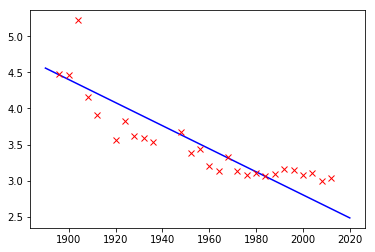

In [15]:
f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

## Multiple Input Solution with Linear Algebra

You've now seen how slow it can be to perform a coordinate ascent on a system. Another approach to solving the system (which is not always possible, particularly in *non-linear* systems) is to go direct to the minimum. To do this we need to introduce *linear algebra*. We will represent all our errors and functions in the form of linear algebra. 

As we mentioned above, linear algebra is just a shorthand for performing lots of multiplications and additions simultaneously. What does it have to do with our system then? Well the first thing to note is that the linear function we were trying to fit has the following form:
$$
f(x) = mx + c
$$
the classical form for a straight line. From a linear algebraic perspective we are looking for multiplications and additions. We are also looking to separate our parameters from our data. The data is the *givens* remember, in French the word is données literally translated means *givens* that's great, because we don't need to change the data, what we need to change are the parameters (or variables) of the model. In this function the data comes in through $x$, and the parameters are $m$ and $c$. 

What we'd like to create is a vector of parameters and a vector of data. Then we could represent the system with vectors that represent the data, and vectors that represent the parameters. 

We look to turn the multiplications and additions into a linear algebraic form, we have one multiplication ($m\times c$) and one addition ($mx + c$). But we can turn this into a inner product by writing it in the following way,
$$
f(x) = m \times x + c \times 1,
$$
in other words we've extracted the unit value, from the offset, $c$. We can think of this unit value like an extra item of data, because it is always given to us, and it is always set to 1 (unlike regular data, which is likely to vary!). We can therefore write each input data location, $\mathbf{x}$, as a vector
$$
\mathbf{x} = \begin{bmatrix} 1\\ x\end{bmatrix}.
$$

Now we choose to also turn our parameters into a vector. The parameter vector will be defined to contain 
$$
\mathbf{w} = \begin{bmatrix} c \\ m\end{bmatrix}
$$
because if we now take the inner product between these to vectors we recover
$$
\mathbf{x}\cdot\mathbf{w} = 1 \times c + x \times m = mx + c
$$
In `numpy` we can define this vector as follows

In [16]:
# define the vector w
w = np.zeros(shape=(2, 1))
w[0] = m
w[1] = c

This gives us the equivalence between original operation and an operation in vector space. Whilst the notation here isn't a lot shorter, the beauty is that we will be able to add as many features as we like and still keep the same representation. In general, we are now moving to a system where each of our predictions is given by an inner product. When we want to represent a linear product in linear algebra, we tend to do it with the transpose operation, so since we have $\mathbf{a}\cdot\mathbf{b} = \mathbf{a}^\top\mathbf{b}$ we can write
$$
f(\mathbf{x}_i) = \mathbf{x}_i^\top\mathbf{w}.
$$
Where we've assumed that each data point, $\mathbf{x}_i$, is now written by appending a 1 onto the original vector
$$
\mathbf{x}_i = 
\begin{bmatrix} 
1 \\
x_i
\end{bmatrix}
$$

## Design Matrix

We can do this for the entire data set to form a [*design matrix*](http://en.wikipedia.org/wiki/Design_matrix) $\mathbf{X}$,

$$\mathbf{X} = \begin{bmatrix} 
\mathbf{x}_1^\top \\\ 
\mathbf{x}_2^\top \\\ 
\vdots \\\
\mathbf{x}_n^\top
\end{bmatrix} = \begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
\vdots & \vdots \\\
1 & x_n 
\end{bmatrix},$$

which in `numpy` can be done with the following commands:

In [17]:
X = np.hstack((np.ones_like(x), x))
print(X)

[[1.000e+00 1.896e+03]
 [1.000e+00 1.900e+03]
 [1.000e+00 1.904e+03]
 [1.000e+00 1.908e+03]
 [1.000e+00 1.912e+03]
 [1.000e+00 1.920e+03]
 [1.000e+00 1.924e+03]
 [1.000e+00 1.928e+03]
 [1.000e+00 1.932e+03]
 [1.000e+00 1.936e+03]
 [1.000e+00 1.948e+03]
 [1.000e+00 1.952e+03]
 [1.000e+00 1.956e+03]
 [1.000e+00 1.960e+03]
 [1.000e+00 1.964e+03]
 [1.000e+00 1.968e+03]
 [1.000e+00 1.972e+03]
 [1.000e+00 1.976e+03]
 [1.000e+00 1.980e+03]
 [1.000e+00 1.984e+03]
 [1.000e+00 1.988e+03]
 [1.000e+00 1.992e+03]
 [1.000e+00 1.996e+03]
 [1.000e+00 2.000e+03]
 [1.000e+00 2.004e+03]
 [1.000e+00 2.008e+03]
 [1.000e+00 2.012e+03]]


### Writing the Objective with Linear Algebra

When we think of the objective function, we can think of it as the errors where the error is defined in a similar way to what it was in Legendre's day $y_i - f(\mathbf{x}_i)$, in statistics these errors are also sometimes called [*residuals*](http://en.wikipedia.org/wiki/Errors_and_residuals_in_statistics). So we can think as the objective and the prediction function as two separate parts, first we have,
$$
E(\mathbf{w}) = \sum_{i=1}^n (y_i - f(\mathbf{x}_i; \mathbf{w}))^2,
$$
where we've made the function $f(\cdot)$'s dependence on the parameters $\mathbf{w}$ explicit in this equation. Then we have the definition of the function itself,
$$
f(\mathbf{x}_i; \mathbf{w}) = \mathbf{x}_i^\top \mathbf{w}.
$$
Let's look again at these two equations and see if we can identify any inner products. The first equation is a sum of squares, which is promising. Any sum of squares can be represented by an inner product,
$$
a = \sum_{i=1}^{k} b^2_i = \mathbf{b}^\top\mathbf{b},
$$
so if we wish to represent $E(\mathbf{w})$ in this way, all we need to do is convert the sum operator to an inner product. We can get a vector from that sum operator by placing both $y_i$ and $f(\mathbf{x}_i; \mathbf{w})$ into vectors, which we do by defining 
$$
\mathbf{y} = \begin{bmatrix}y_1\\y_2\\ \vdots \\ y_n\end{bmatrix}
$$
and defining
$$
\mathbf{f}(\mathbf{X}; \mathbf{w}) = \begin{bmatrix}f(\mathbf{x}_1; \mathbf{w})\\f(\mathbf{x}_2; \mathbf{w})\\ \vdots \\ f(\mathbf{x}_n; \mathbf{w})\end{bmatrix}.
$$
The second of these is actually a vector-valued function. This term may appear intimidating, but the idea is straightforward. A vector valued function is simply a vector whose elements are themselves defined as *functions*, i.e. it is a vector of functions, rather than a vector of scalars. The idea is so straightforward, that we are going to ignore it for the moment, and barely use it in the derivation. But it will reappear later when we introduce *basis functions*. So we will, for the moment, ignore the dependence of $\mathbf{f}$ on $\mathbf{w}$ and $\mathbf{X}$ and simply summarise it by a vector of numbers
$$
\mathbf{f} = \begin{bmatrix}f_1\\f_2\\ \vdots \\ f_n\end{bmatrix}.
$$
This allows us to write our objective in the folowing, linear algebraic form,
$$
E(\mathbf{w}) = (\mathbf{y} - \mathbf{f})^\top(\mathbf{y} - \mathbf{f})
$$
from the rules of inner products.

But what of our matrix $\mathbf{X}$ of input data? At this point, we need to dust off [*matrix-vector multiplication*](http://en.wikipedia.org/wiki/Matrix_multiplication). Matrix multiplication is simply a convenient way of performing many inner products together, and it's exactly what we need to summarise the operation
$$
f_i = \mathbf{x}_i^\top\mathbf{w}.
$$
This operation tells us that each element of the vector $\mathbf{f}$ (our vector valued function) is given by an inner product between $\mathbf{x}_i$ and $\mathbf{w}$. In other words it is a series of inner products. Let's look at the definition of matrix multiplication, it takes the form
$$
\mathbf{c} = \mathbf{B}\mathbf{a}
$$
where $\mathbf{c}$ might be a $k$ dimensional vector (which we can intepret as a $k\times 1$ dimensional matrix), and $\mathbf{B}$ is a $k\times k$ dimensional matrix and $\mathbf{a}$ is a $k$ dimensional vector ($k\times 1$ dimensional matrix). 

The result of this multiplication is of the form
$$
\begin{bmatrix}c_1\\c_2 \\ \vdots \\ a_k\end{bmatrix} = 
\begin{bmatrix} b_{1,1} & b_{1, 2} & \dots & b_{1, k} \\
b_{2, 1} & b_{2, 2} & \dots & b_{2, k} \\
\vdots & \vdots & \ddots & \vdots \\
b_{k, 1} & b_{k, 2} & \dots & b_{k, k} \end{bmatrix} \begin{bmatrix}a_1\\a_2 \\ \vdots\\ c_k\end{bmatrix} = \begin{bmatrix} b_{1, 1}a_1 + b_{1, 2}a_2 + \dots + b_{1, k}a_k\\
b_{2, 1}a_1 + b_{2, 2}a_2 + \dots + b_{2, k}a_k \\ 
\vdots\\ 
b_{k, 1}a_1 + b_{k, 2}a_2 + \dots + b_{k, k}a_k\end{bmatrix}
$$
so we see that each element of the result, $\mathbf{a}$ is simply the inner product between each *row* of $\mathbf{B}$ and the vector $\mathbf{c}$. Because we have defined each element of $\mathbf{f}$ to be given by the inner product between each *row* of the design matrix and the vector $\mathbf{w}$ we now can write the full operation in one matrix multiplication,
$$
\mathbf{f} = \mathbf{X}\mathbf{w}.
$$

In [18]:
f = np.dot(X, w) # np.dot does matrix multiplication in python

Combining this result with our objective function,
$$
E(\mathbf{w}) = (\mathbf{y} - \mathbf{f})^\top(\mathbf{y} - \mathbf{f})
$$
we find we have defined the *model* with two equations. One equation tells us the form of our predictive function and how it depends on its parameters, the other tells us the form of our objective function.

In [19]:
resid = (y-f)
E = np.dot(resid.T, resid) # matrix multiplication on a single vector is equivalent to a dot product.
print("Error function is:", E)

Error function is: [[1.2466652e+11]]


### Assignment Question 4

The prediction for our movie recommender system had the form
$$
f_{i,j} = \mathbf{u}_i^\top \mathbf{v}_j
$$
and the objective function was then
$$
E = \sum_{i,j} s_{i,j}(y_{i,j} - f_{i, j})^2
$$
Try writing this down in matrix and vector form. How many of the terms can you do? For each variable and parameter carefully think about whether it should be represented as a matrix or vector. Do as many of the terms as you can. Use $\LaTeX$ to give your answers and give the *dimensions* of any matrices you create.

*20 marks* 

#### Question 4 Answer

Write your answer to the question in this box.

If $f_{i,j} = \mathbf{u}_i^\top \mathbf{v}_j$ we know that $\mathbf{U} = \begin{bmatrix} \mathbf{u}_1 \dots \mathbf{u}_n\end{bmatrix}^\top$ and $\mathbf{V} = \begin{bmatrix} \mathbf{v}_1 \dots \mathbf{v}_m\end{bmatrix}^\top$. 

$\mathbf{U}$ and $\mathbf{V}$ are matrixes with dimensions $2\times n$ and $2\times m$ respectively. 
This is because $\mathbf{u}_i = \begin{bmatrix} u_{i,1} \\ u_{i,2}\end{bmatrix}$ and $\mathbf{v}_j = \begin{bmatrix} v_{j,1} \\ v_{j,2}\end{bmatrix}$ hence $\mathbf{u}_i$ and $\mathbf{v}_j$ are vectors with dimensions $2\times 1$. 

Therefore $f_{i,j} = \mathbf{u}_i^\top \mathbf{v}_j$ is a matrix with dimensions $n\times m$ because of the transpose of $\mathbf{u}_i$ giving ${n}$ number of rows and $\mathbf{v}_j$ giving ${m}$ number of columns.

Given $f_{i,j}$ has $n\times m$ dimensions, $y_{i,j}$ and $s_{i,j}$ will have $n\times m$ dimensions.

Firstly, calculating ${X} = y_{i,j} - f_{i,j} = Y - F$; <br> <br>

${X} = y_{i,j} - f_{i,j} = Y - F = \begin{bmatrix} y_{1, 1} & y_{1, 2} & \dots & y_{1, m} \\
y_{2, 1} & y_{2, 2} & \dots & y_{2, m} \\
\vdots & \vdots & \ddots & \vdots \\
y_{n, 1} & y_{n, 2} & \dots & y_{n, m} \end{bmatrix} - \begin{bmatrix} f_{1, 1} & f_{1, 2} & \dots & f_{1, m} \\
f_{2, 1} & f_{2, 2} & \dots & f_{2, m} \\
\vdots & \vdots & \ddots & \vdots \\
f_{n, 1} & f_{n, 2} & \dots & f_{n, m} \end{bmatrix} = \begin{bmatrix} y_{1, 1} - f_{1, 1} & y_{1, 2} - f_{1, 2} & \dots & y_{1, m} - f_{1, m} \\
y_{2, 1} - f_{2, 1} & y_{2, 2} - f_{2, 2} & \dots & y_{2, m} - f_{2, m} \\
\vdots & \vdots & \ddots & \vdots \\
y_{n, 1} - f_{n, 1} & y_{n, 2} - f_{n, 2} & \dots & y_{n, m} - f_{n, m} \end{bmatrix} = \begin{bmatrix} x_{1,1} & x_{1, 2} & \dots & x_{1, m} \\
x_{2, 1} & x_{2, 2} & \dots & x_{2, m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n, 1} & x_{n, 2} & \dots & x_{n, m} \end{bmatrix}$ <br> <br>

Next the matrix $X$ must be squared with the resultant matix also being $n\times m$ dimension; <br> <br>
$W = X \cdot X = \begin{bmatrix} x_{1,1} & x_{1, 2} & \dots & x_{1, m} \\
x_{2, 1} & x_{2, 2} & \dots & x_{2, m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n, 1} & x_{n, 2} & \dots & x_{n, m} \end{bmatrix} \cdot \begin{bmatrix} x_{1,1} & x_{1, 2} & \dots & x_{1, m} \\
x_{2, 1} & x_{2, 2} & \dots & x_{2, m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n, 1} & x_{n, 2} & \dots & x_{n, m} \end{bmatrix} = \begin{bmatrix} x_{1,1}^2 & x_{1, 2}^2 & \dots & x_{1, m}^2 \\
x_{2, 1}^2 & x_{2, 2}^2 & \dots & x_{2, m}^2 \\
\vdots & \vdots & \ddots & \vdots \\
x_{n, 1}^2 & x_{n, 2}^2 & \dots & x_{n, m}^2 \end{bmatrix}$ <br><br>

Finally, calculating $K = s_{i,j} \cdot W = S \cdot W$ gives; <br><br>

$K = s_{i,j} \cdot W = S \cdot W =\begin{bmatrix} s_{1,1} & s_{1, 2} & \dots & s_{1, m} \\
s_{2, 1} & s_{2, 2} & \dots & s_{2, m} \\
\vdots & \vdots & \ddots & \vdots \\
s_{n, 1} & s_{n, 2} & \dots & s_{n, m} \end{bmatrix} \cdot \begin{bmatrix} x_{1,1}^2 & x_{1, 2}^2 & \dots & x_{1, m}^2 \\
x_{2, 1}^2 & x_{2, 2}^2 & \dots & x_{2, m}^2 \\
\vdots & \vdots & \ddots & \vdots \\
x_{n, 1}^2 & x_{n, 2}^2 & \dots & x_{n, m}^2 \end{bmatrix} = \begin{bmatrix} s_{1,1} \cdot x_{1,1}^2 & s_{1,2} \cdot x_{1, 2}^2 & \dots & s_{1,m} \cdot x_{1, m}^2 \\
s_{2,1} \cdot x_{2, 1}^2 & s_{2,2} \cdot x_{2, 2}^2 & \dots & s_{2,m} \cdot x_{2, m}^2 \\
\vdots & \vdots & \ddots & \vdots \\
s_{n,1} \cdot x_{n, 1}^2 & s_{n,2} \cdot x_{n, 2}^2 & \dots & s_{n,m} \cdot x_{n, m}^2 \end{bmatrix}$ <br><br>

The elements in the sum of $K$ are $i$ and $j$ which both are vectors with the dimensions $n\times 1$ and $m\times 1$ respectively;

$i = I_n = \begin{bmatrix}1\\1\\ \vdots \\1\end{bmatrix}$ <br>
$j = J_m = \begin{bmatrix}1\\1\\ \vdots \\1\end{bmatrix}$

Taking the objective function $E = \sum_{i,j} s_{i,j}(y_{i,j} - f_{i, j})^2$ and using the matrixes calculated;

$$E = I_n^\top J_mK$$ <br>
$$E = I_n^\top J_mS \cdot W$$ <br>
$$E = I_n^\top J_mS \cdot (X \cdot X)$$ <br>
$$E = I_n^\top J_mS \cdot(Y - F)\cdot(Y - F)$$

## Objective Optimisation

Our *model* has now been defined with two equations, the prediction function and the objective function. Next we will use multivariate calculus to define an *algorithm* to fit the model. The separation between model and algorithm is important and is often overlooked. Our model contains a function that shows how it will be used for prediction, and a function that describes the objective function we need to optimise to obtain a good set of parameters. 

The linear regression model we have described is still the same as the one we fitted above with a coordinate ascent algorithm. We have only played with the notation to obtain the same model in a matrix and vector notation. However, we will now fit this model with a different algorithm, one that is much faster. It is such a widely used algorithm that from the end user's perspective it doesn't even look like an algorithm, it just appears to be a single operation (or function). However, underneath the computer calls an algorithm to find the solution. Further, the algorithm we obtain is very widely used, and because of this it turns out to be highly optimised.

Once again we are going to try and find the stationary points of our objective by finding the *stationary points*. However, the stationary points of a multivariate function, are a little bit more complext to find. Once again we need to find the point at which the derivative is zero, but now we need to use  *multivariate calculus* to find it. This involves learning a few additional rules of differentiation (that allow you to do the derivatives of a function with respect to  vector), but in the end it makes things quite a bit easier. We define vectorial derivatives as follows,
$$
\frac{\text{d}E(\mathbf{w})}{\text{d}\mathbf{w}} = \begin{bmatrix}\frac{\partial E(\mathbf{w})}{\partial w_1}\\\frac{\partial E(\mathbf{w})}{\partial w_2}\end{bmatrix}.
$$
where $\frac{\partial E(\mathbf{w})}{\partial w_1}$ is the [partial derivative](http://en.wikipedia.org/wiki/Partial_derivative) of the error function with respect to $w_1$.

Differentiation through multiplications and additions is relatively straightforward, and since linear algebra is just multiplication and addition, then its rules of diffentiation are quite straightforward too, but slightly more complex than regular derivatives. 

### Matrix Differentiation

We will need two rules of differentiation. The first is diffentiation of an inner product. By remebering that the inner product is made up of multiplication and addition, we can hope that its derivative is quite straightforward, and so it proves to be. We can start by thinking about the definition of the inner product,
$$
\mathbf{a}^\top\mathbf{z} = \sum_{i} a_i z_i,
$$
which if we were to take the derivative with respect to $z_k$ would simply return the gradient of the one term in the sum for which the derivative was non zero, that of $a_k$, so we know that 
$$
\frac{\text{d}}{\text{d}z_k} \mathbf{a}^\top \mathbf{z} = a_k
$$
and by our definition of multivariate derivatives we can simply stack all the partial derivatives of this form in a vector to obtain the result that
$$
\frac{\text{d}}{\text{d}\mathbf{z}} \mathbf{a}^\top \mathbf{z} = \mathbf{a}.
$$
The second rule that's required is differentiation of a 'matrix quadratic'. A scalar quadratic in $z$ with coefficient $c$ has the form $cz^2$. If $\mathbf{z}$ is a $k\times 1$ vector and $\mathbf{C}$ is a $k \times k$ *matrix* of coefficients then the matrix quadratic form is written as $\mathbf{z}^\top \mathbf{C}\mathbf{z}$, which is itself a *scalar* quantity, but it is a function of a *vector*. 

#### Matching Dimensions in Matrix Multiplications

There's a trick for telling that it's a scalar result. When you are doing maths with matrices, it's always worth pausing to perform a quick sanity check on the dimensions. Matrix multplication only works when the dimensions match. To be precise, the 'inner' dimension of the matrix must match. What is the inner dimension. If we multiply two matrices $\mathbf{A}$ and $\mathbf{B}$, the first of which has $k$ rows and $\ell$ columns and the second of which has $p$ rows and $q$ columns, then we can check whether the multiplication works by writing the dimensionalities next to each other,
$$
\mathbf{A} \mathbf{B} \rightarrow (k \times \underbrace{\ell)(p}_\text{inner dimensions} \times q) \rightarrow (k\times q).
$$
The inner dimensions are the two inside dimensions, $\ell$ and $p$. The multiplication will only work if $\ell=p$. The result of the multiplication will then be a $k\times q$ matrix: this dimensionality comes from the 'outer dimensions'. Note that matrix multiplication is not [*commutative*](http://en.wikipedia.org/wiki/Commutative_property). And if you change the order of the multiplication, 
$$
\mathbf{B} \mathbf{A} \rightarrow (\ell \times \underbrace{k)(q}_\text{inner dimensions} \times p) \rightarrow (\ell \times p).
$$
firstly it may no longer even work, because now the condition is that $k=q$, and secondly the result could be of a different dimensionality. An exception is if the matrices are square matrices (e.g. same number of rows as columns) and they are both *symmetric*. A symmetric matrix is one for which $\mathbf{A}=\mathbf{A}^\top$, or equivalently, $a_{i,j} = a_{j,i}$ for all $i$ and $j$.  

You will need to get used to working with matrices and vectors applying and developing new machine learning techniques. You should have come across them before, but you may not have used them as extensively as we will now do in this course. You should get used to using this trick to check your work and ensure you know what the dimension of an output matrix should be. For our matrix quadratic form, it turns out that we can see it as a special type of inner product.
$$
\mathbf{z}^\top\mathbf{C}\mathbf{z} \rightarrow (1\times \underbrace{k) (k}_\text{inner dimensions}\times k) (k\times 1) \rightarrow \mathbf{b}^\top\mathbf{z}
$$
where $\mathbf{b} = \mathbf{C}\mathbf{z}$ so therefore the result is a scalar,
$$
\mathbf{b}^\top\mathbf{z} \rightarrow (1\times \underbrace{k) (k}_\text{inner dimensions}\times 1) \rightarrow (1\times 1)
$$
where a $(1\times 1)$ matrix is recognised as a scalar.

This implies that we should be able to differentiate this form, and indeed the rule for its differentiation is slightly more complex than the inner product, but still quite simple,
$$
\frac{\text{d}}{\text{d}\mathbf{z}} \mathbf{z}^\top\mathbf{C}\mathbf{z}= \mathbf{C}\mathbf{z} + \mathbf{C}^\top \mathbf{z}.
$$
Note that in the special case where $\mathbf{C}$ is symmetric then we have $\mathbf{C} = \mathbf{C}^\top$ and the derivative simplifies to 
$$
\frac{\text{d}}{\text{d}\mathbf{z}} \mathbf{z}^\top\mathbf{C}\mathbf{z}= 2\mathbf{C}\mathbf{z}.
$$
### Differentiating the Objective

First, we need to compute the full objective by substituting our prediction function into the objective function to obtain the objective in terms of $\mathbf{w}$. Doing this we obtain
$$
E(\mathbf{w})= (\mathbf{y} - \mathbf{X}\mathbf{w})^\top (\mathbf{y} - \mathbf{X}\mathbf{w}).
$$
We now need to differentiate this *quadratic form* to find the minimum. We differentiate with respect to the *vector* $\mathbf{w}$. But before we do that, we'll expand the brackets in the quadratic form to obtain a series of scalar terms. The rules for bracket expansion across the vectors are similar to those for the scalar system giving,
$$
(\mathbf{a} - \mathbf{b})^\top (\mathbf{c} - \mathbf{d}) = \mathbf{a}^\top \mathbf{c} - \mathbf{a}^\top \mathbf{d} - \mathbf{b}^\top \mathbf{c} + \mathbf{b}^\top \mathbf{d}
$$
which substituting for $\mathbf{a} = \mathbf{c} = \mathbf{y}$ and $\mathbf{b}=\mathbf{d} = \mathbf{X}\mathbf{w}$ gives
$$
E(\mathbf{w})= \mathbf{y}^\top\mathbf{y} - 2\mathbf{y}^\top\mathbf{X}\mathbf{w} + \mathbf{w}^\top\mathbf{X}^\top\mathbf{X}\mathbf{w}
$$
where we used the fact that $\mathbf{y}^\top\mathbf{X}\mathbf{w}= \mathbf{w}^\top\mathbf{X}^\top\mathbf{y}$. Now we can use our rules of differentiation to compute the derivative of this form, which is,
$$
\frac{\text{d}}{\text{d}\mathbf{w}}E(\mathbf{w})=- 2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top\mathbf{X}\mathbf{w},
$$
where we have exploited the fact that $\mathbf{X}^\top\mathbf{X}$ is symmetric to obtain this result.

### Assignment Question 5

Use the equivalence between our vector and our matrix formulations of linear regression, alongside our definition of vector derivates, to match the gradients we've computed directly for $\frac{\text{d}E(c, m)}{\text{d}c}$ and $\frac{\text{d}E(c, m)}{\text{d}m}$ to those for $\frac{\text{d}E(\mathbf{w})}{\text{d}\mathbf{w}}$.

*20 marks*

#### Question 5 Answer

Write your answer to the question in this box.

Our expression is:
$$
\frac{\text{d}}{\text{d}\mathbf{w}}E(\mathbf{w})=- 2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top\mathbf{X}\mathbf{w},
$$
Since we know that:
$$
\frac{\text{d}E(\mathbf{w})}{\text{d}\mathbf{w}} = \begin{bmatrix}\frac{\partial E(\mathbf{w})}{\partial w_1}\\\frac{\partial E(\mathbf{w})}{\partial w_2}\end{bmatrix},
$$
$$\mathbf{X} = \begin{bmatrix} 
\mathbf{x}_1^\top \\\ 
\mathbf{x}_2^\top \\\ 
\vdots \\\
\mathbf{x}_n^\top
\end{bmatrix} = \begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
\vdots & \vdots \\\
1 & x_n 
\end{bmatrix},$$
$$
\mathbf{y} = \begin{bmatrix}y_1\\y_2\\ \vdots \\ y_n\end{bmatrix}
$$
and
$$
\mathbf{w} = \begin{bmatrix} c \\ m\end{bmatrix}
$$
we get the following expression:
$$
\begin{bmatrix}\frac{\partial E(\mathbf{w})}{\partial w_1}\\\frac{\partial E(\mathbf{w})}{\partial w_2}\end{bmatrix} = -2 \begin{bmatrix}
1 & 1 & \dots & 1 \\\ 
x_1  & x_2 & \dots &  x_n 
\end{bmatrix}
\begin{bmatrix}y_1\\y_2\\ \vdots \\ y_n\end{bmatrix} + 2 \begin{bmatrix}
1 & 1 & \dots & 1 \\\ 
x_1  & x_2 & \dots &  x_n 
\end{bmatrix} \begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
\vdots & \vdots \\\
1 & x_n 
\end{bmatrix} \begin{bmatrix} w_1 \\ w_2\end{bmatrix}.
$$

By computing the multiplications, we get the following result:
$$
\begin{bmatrix}\frac{\partial E(\mathbf{w})}{\partial w_1}\\\frac{\partial E(\mathbf{w})}{\partial w_2}\end{bmatrix} =
-2 \begin{bmatrix} y1+y2+\dots+y_n \\\ x_1y_1+x_2y_2+\dots+x_ny_n\end{bmatrix} 
+ 2 \begin{bmatrix} nw_1 + (x_1+x_2+\dots+ x_n)w_2 \\\ (x_1+x_2+\dots+x_n)w_1 + (x_1+x_2+\dots+x_n)^2w_2\end{bmatrix}
\Rightarrow
$$
$$
\begin{bmatrix}\frac{\partial E(\mathbf{w})}{\partial w_1}\\\frac{\partial E(\mathbf{w})}{\partial w_2}\end{bmatrix} =
-2 \begin{bmatrix} \sum_{i}^n y_i \\\ \sum_{i}^n x_iy_i\end{bmatrix} 
+ 2 \begin{bmatrix} \sum_{i}^n w_1 + \sum_{i}^n x_iw_2 \\\ \sum_{i}^n x_i(w_1+x_iw_2)\end{bmatrix}
$$
$$
\begin{bmatrix}\frac{\partial E(\mathbf{w})}{\partial w_1}\\\frac{\partial E(\mathbf{w})}{\partial w_2}\end{bmatrix} =
-2 \begin{bmatrix} \sum_{i}^n (y_i - w_1 -  x_iw_2) \\\ \sum_{i}^n (x_iy_i - x_i(w_1+x_iw_2))\end{bmatrix} 
$$

Now, by replacing $w_1 = c$ and $w_2 = m$, we notice that we get the gradients we've computed directly for $\frac{\text{d}E(c, m)}{\text{d}c}$ and $\frac{\text{d}E(c, m)}{\text{d}m}$:

$$
\begin{bmatrix}\frac{\partial E(\mathbf{w})}{\partial c}\\\frac{\partial E(\mathbf{w})}{\partial m}\end{bmatrix} =
-2 \begin{bmatrix} \sum_{i}^n (y_i - c -  mx_i) \\\ \sum_{i}^n x_i(y_i - c - x_im)\end{bmatrix} 
$$


## Update Equation for Global Optimum

Once again, we need to find the minimum of our objective function. Using our likelihood for multiple input regression we can now minimize for our parameter vector $\mathbf{w}$. Firstly, just as in the single input case, we seek stationary points by finding parameter vectors that solve for when the gradients are zero,
$$
\mathbf{0}=- 2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top\mathbf{X}\mathbf{w},
$$
where $\mathbf{0}$ is a *vector* of zeros. Rearranging this equation we find the solution to be
$$
\mathbf{w} = \left[\mathbf{X}^\top \mathbf{X}\right]^{-1} \mathbf{X}^\top \mathbf{y}
$$ 
where $\mathbf{A}^{-1}$ denotes [*matrix inverse*](http://en.wikipedia.org/wiki/Invertible_matrix).

### Solving the Multivariate System

The solution for $\mathbf{w}$ is given in terms of a matrix inverse, but computation of a matrix inverse requires, in itself, an algorithm to resolve it. You'll know this if you had to invert, by hand, a $3\times 3$ matrix in high school. From a numerical stability perspective, it is also best not to compute the matrix inverse directly, but rather to ask the computer to *solve* the  system of linear equations given by
$$\mathbf{X}^\top\mathbf{X} \mathbf{w} = \mathbf{X}^\top\mathbf{y}$$
for $\mathbf{w}$. This can be done in `numpy` using the command

In [20]:
np.linalg.solve?

so we can obtain the solution using

In [21]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(w)

[[ 2.88952457e+01]
 [-1.29806477e-02]]


We can map it back to the liner regression and plot the fit as follows

[-0.01298065]
[28.89524574]


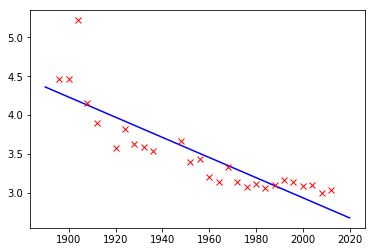

In [22]:
m = w[1]; c=w[0]
f_test = m*x_test + c
print(m)
print(c)
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

## Multivariate Linear Regression

A major advantage of the new system is that we can build a linear regression on a multivariate system. The matrix calculus didn't specify what the length of the vector $\mathbf{x}$ should be, or equivalently the size of the design matrix. 

### Movie Body Count Data

Let's load back in the movie body count data.

In [23]:
data = pods.datasets.movie_body_count()
movies = data['Y']

Acquiring resource: movie_body_count

Details of data: 
Data scraped from www.MovieBodyCounts.com and www.imdb.com using scripts provided on a github repository (in both Python and R) at https://github.com/morpionZ/R-vs-Python/tree/master/Deadliest%20movies%20scrape/code. This script pulls down the scraped data.

Please cite:
Simon Garnier and Randy Olson, Blog Post: R vs Python Round 2, February 2nd 2014 (http://www.theswarmlab.com/r-vs-python-round-2-22/)

After downloading the data will take up 536272 bytes of space.

Data will be stored in C:\Users\acp18dck/ods_data_cache/movie_body_count.

Do you wish to proceed with the download? [yes/no]
yes
[==============================]   0.366/0.366MB                                                                                                                                                                                                                                                                                                       

Let's remind ourselves of the features we've been provided with.

In [24]:
print(', '.join(movies.columns))

Film, Year, Body_Count, MPAA_Rating, Genre, Director, Actors, Length_Minutes, IMDB_Rating


Now we will build a design matrix based on the numeric features: year, Body_Count, Length_Minutes in an effort to predict the rating. We build the design matrix as follows:

## Relation to Single Input System

Bias as an additional feature.

In [25]:
select_features = ['Year', 'Body_Count', 'Length_Minutes']
X = movies.loc[:, select_features]
X['Eins'] = 1 # add a column for the offset
y = movies[['IMDB_Rating']]

Now let's perform a linear regression. But this time, we will create a pandas data frame for the result so we can store it in a form that we can visualise easily.

In [26]:
import pandas as pd
w = pd.DataFrame(data=np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y)),  # solve linear regression here
                 index = X.columns,  # columns of X become rows of w
                 columns=['regression_coefficient']) # the column of X is the value of regression coefficient
w

,regression_coefficient
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363


We can check the residuals to see how good our estimates are

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E946D91E80>]],
      dtype=object)

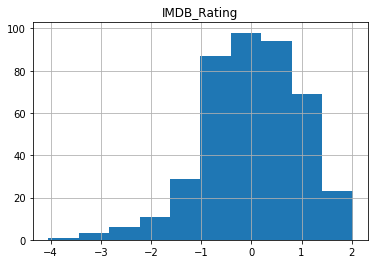

In [27]:
(y - np.dot(X, w)).hist()

Which shows our model *hasn't* yet done a great job of representation, because the spread of values is large. We can check what the rating is dominated by in terms of regression coefficients.

In [28]:
w

,regression_coefficient
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363


Although we have to be a little careful about interpretation because our input values live on different scales, however it looks like we are dominated by the bias, with a small negative effect for later films (but bear in mind the years are large, so this effect is probably larger than it looks) and a positive effect for length. So it looks like long earlier films generally do better, but the residuals are so high that we probably haven't modelled the system very well.

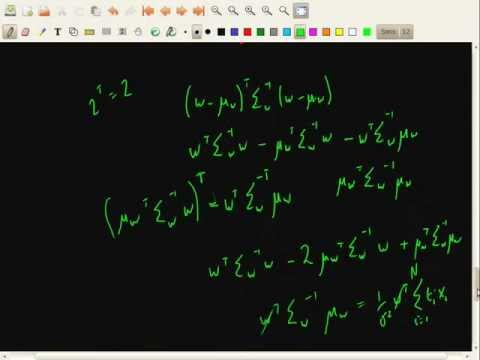

In [29]:
from IPython.display import YouTubeVideo
YouTubeVideo('ui-uNlFHoms')

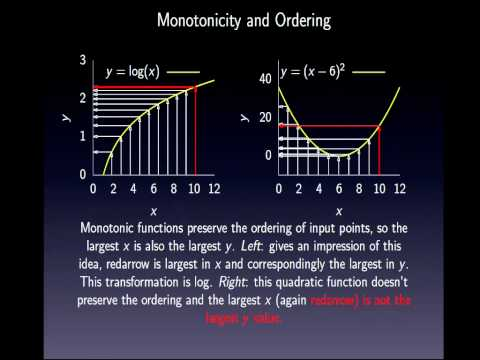

In [30]:
from IPython.display import YouTubeVideo
YouTubeVideo('78YNphT90-k')

## Solution with QR Decomposition

Performing a solve instead of a matrix inverse is the more numerically stable approach, but we can do even better. A [QR-decomposition](http://en.wikipedia.org/wiki/QR_decomposition) of a matrix factorises it into a matrix which is an orthogonal matrix $\mathbf{Q}$, so that $\mathbf{Q}^\top \mathbf{Q} = \mathbf{I}$. And a matrix which is upper triangular, $\mathbf{R}$. 
$$
\mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} = \mathbf{X}^\top \mathbf{y}
$$
$$
(\mathbf{Q}\mathbf{R})^\top (\mathbf{Q}\mathbf{R})\boldsymbol{\beta} = (\mathbf{Q}\mathbf{R})^\top \mathbf{y}
$$
$$
\mathbf{R}^\top (\mathbf{Q}^\top \mathbf{Q}) \mathbf{R} \boldsymbol{\beta} = \mathbf{R}^\top \mathbf{Q}^\top \mathbf{y}
$$
$$
\mathbf{R}^\top \mathbf{R} \boldsymbol{\beta} = \mathbf{R}^\top \mathbf{Q}^\top \mathbf{y}
$$
$$
\mathbf{R} \boldsymbol{\beta} = \mathbf{Q}^\top \mathbf{y}
$$
This is a more numerically stable solution because it removes the need to compute $\mathbf{X}^\top\mathbf{X}$ as an intermediate. Computing $\mathbf{X}^\top\mathbf{X}$ is a bad idea because it involves squaring all the elements of $\mathbf{X}$ and thereby potentially reducing the numerical precision with which we can represent the solution. Operating on $\mathbf{X}$ directly preserves the numerical precision of the model.

This can be more particularly seen when we begin to work with *basis functions* in the next week. Some systems that can be resolved with the QR decomposition can not be resolved by using solve directly.

In [31]:
import scipy as sp
Q, R = np.linalg.qr(X)
w = sp.linalg.solve_triangular(R, np.dot(Q.T, y)) 
w = pd.DataFrame(w, index=X.columns)
w

,0
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363
